<a href="https://colab.research.google.com/github/linchen10/Foodborne-Illnesses/blob/main/Foodborne_Illnesses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Lin Chen
#distribution of etiologies for each state in wordcloud

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
df=pd.read_excel("NationalOutbreakPublicDataTool_DMV_only.xlsx")

Search between 1998 and 2018.
Enter start year: 2008
Enter end year: 2018


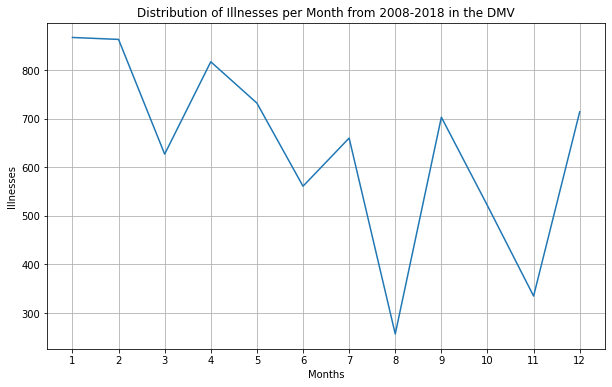

In [ ]:
#Distribution of Illnesses per Month
#Pandas, Matplotlib
def illness_month(): 
  a=True
  while a:
    try:
      print("Search between 1998 and 2018.")
      b=True
      while b:
        start=int(input("Enter start year: "))
        end=int(input("Enter end year: "))
        if start < 1998 or end > 2018:
          print("Invalid search. Try again.")
          b=True
        elif start >= 1998 and end <= 2018:
          if start > end:
            print("Invalid search. Try again.")
            b=True
          else:
            b=False
          
      items=[]
      for i in range(start,end+1):
        items.append(i)
      filter_year=df[df.Year.isin(items)]
      group_month=filter_year.groupby(by="Month").sum()

      #make line plot
      months=group_month.index.tolist() #xaxis
      illness=group_month["Illnesses"].tolist() #yaxis
      plt.figure(figsize=(10,6))
      plt.plot(months,illness)
      plt.xlabel("Months")
      plt.ylabel("Illnesses")
      plt.title(f"Distribution of Illnesses per Month from {start}-{end} in the DMV")
      plt.xticks(months)
      plt.autoscale(enable=False)
      plt.grid()
      a=False
    except:
      a=True
illness_month()


Search between 1998 and 2018.
Enter start year: 2018
Enter end year: 2018


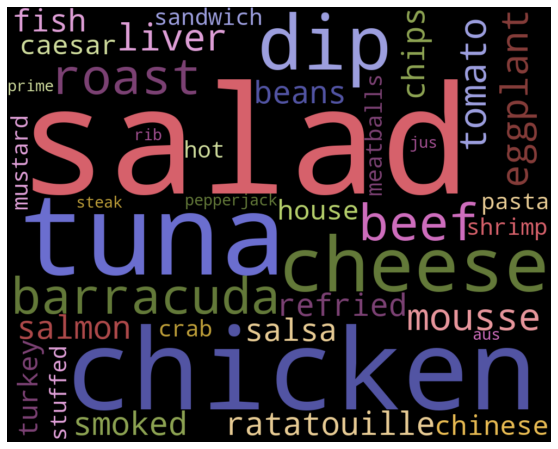

In [ ]:
#Food Vehicle WordCloud
#Lists, WordCloud, Pandas

def food_cloud(): 
  a=True
  while a:
    try:
      print("Search between 1998 and 2018.")
      b=True
      while b:
        start=int(input("Enter start year: "))
        end=int(input("Enter end year: "))
        items=[]
        if start < 1998 or end > 2018:
          print("Invalid search. Try again.")
          b=True
        elif start >= 1998 and end <= 2018:
          if start > end:
            print("Invalid search. Try again.")
            b=True
          else:
            b=False
      for i in range(start,end+1):
        items.append(i)
      filter_year=df[df.Year.isin(items)]

      vehicle=filter_year["Food Vehicle"].dropna()
      vehicle_list=vehicle.values.tolist()
      vehicle_str=" ".join(vehicle_list)

      plt.figure(figsize=(10,8))
      stopwords=["unspecified","unknown"]+list(STOPWORDS)
      wordcloud=WordCloud(width=1000, height=800,background_color="black",colormap="tab20b",collocations=False,stopwords=stopwords).generate(vehicle_str)
      plt.imshow(wordcloud,interpolation="bilinear")
      plt.axis("off")
      plt.show()
      a=False
    except:
      a=True
food_cloud()



Search between 1998 and 2018.
Enter start year: 1998
Enter end year: 1998


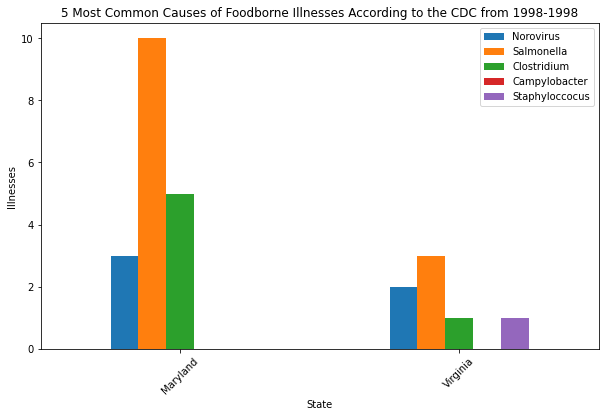

In [ ]:
#5 Most Common Causes of Foodborne Illness
#Pandas, Matplotlib
def top5():
  a=True
  while a:
    try:
      print("Search between 1998 and 2018.")
      b=True
      while b:
        start=int(input("Enter start year: "))
        end=int(input("Enter end year: "))
        if start < 1998 or end > 2018:
          print("Invalid search. Try again.")
          b=True
        elif start >= 1998 and end <= 2018:
          if start > end:
            print("Invalid search. Try again.")
            b=True
          else:
            b=False
  
      items=[]
      for i in range(start,end+1):
        items.append(i)
      filter_year=df[df.Year.isin(items)]
      norovirus=filter_year[filter_year["Etiology"].str.contains("Norovirus",na=False)]
      norovirus=norovirus[["State","Illnesses"]].groupby("State").count().rename(columns={"Illnesses":"Norovirus"})
      salmonella=filter_year[filter_year["Etiology"].str.contains("Salmonella",na=False)]
      salmonella=salmonella[["State","Illnesses"]].groupby("State").count().rename(columns={"Illnesses":"Salmonella"})
      clostridium=filter_year[filter_year["Etiology"].str.contains("Clostridium",na=False)]
      clostridium=clostridium[["State","Illnesses"]].groupby("State").count().rename(columns={"Illnesses":"Clostridium"})
      campylobacter=filter_year[filter_year["Etiology"].str.contains("Campylobacter",na=False)]
      campylobacter=campylobacter[["State","Illnesses"]].groupby("State").count().rename(columns={"Illnesses":"Campylobacter"})
      staphylococcus=filter_year[filter_year["Etiology"].str.contains("Staphylococcus",na=False)]
      staphylococcus=staphylococcus[["State","Illnesses"]].groupby("State").count().rename(columns={"Illnesses":"Staphyloccocus"})
      top5ill=pd.concat([norovirus,salmonella,clostridium,campylobacter,staphylococcus],axis=1)
      top5ill.reset_index(inplace=True)
      top5ill=top5ill.rename(columns={"index":"State"})
      top5ill=top5ill.fillna(0)
      top5ill.plot.bar(x="State",ylabel="Illnesses",title=f"5 Most Common Causes of Foodborne Illnesses According to the CDC from {start}-{end}",figsize=(10,6))
      plt.xticks(rotation=45)
      a=False
    except:
      a=True
top5()